## Some tests of yt

A few first attempts to plot some scalar AMR data.


In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
from clawpack.pyclaw import Solution
import numpy as np
import matplotlib.pyplot as plt
import yt
from IPython.display import Image

By default, yt will output a lot of logging information. In the notebook, this gets in the way so we turn it off.

In [32]:
yt.funcs.mylog.setLevel(0)

We would like to make plots similar to those created with our old Matlab plotting tools, e.g. the data in this directory is for 3d Burgers' equation $q_t + q(q_x + q_y + q_z) = 0$ with initial data that is nonzero in a cube

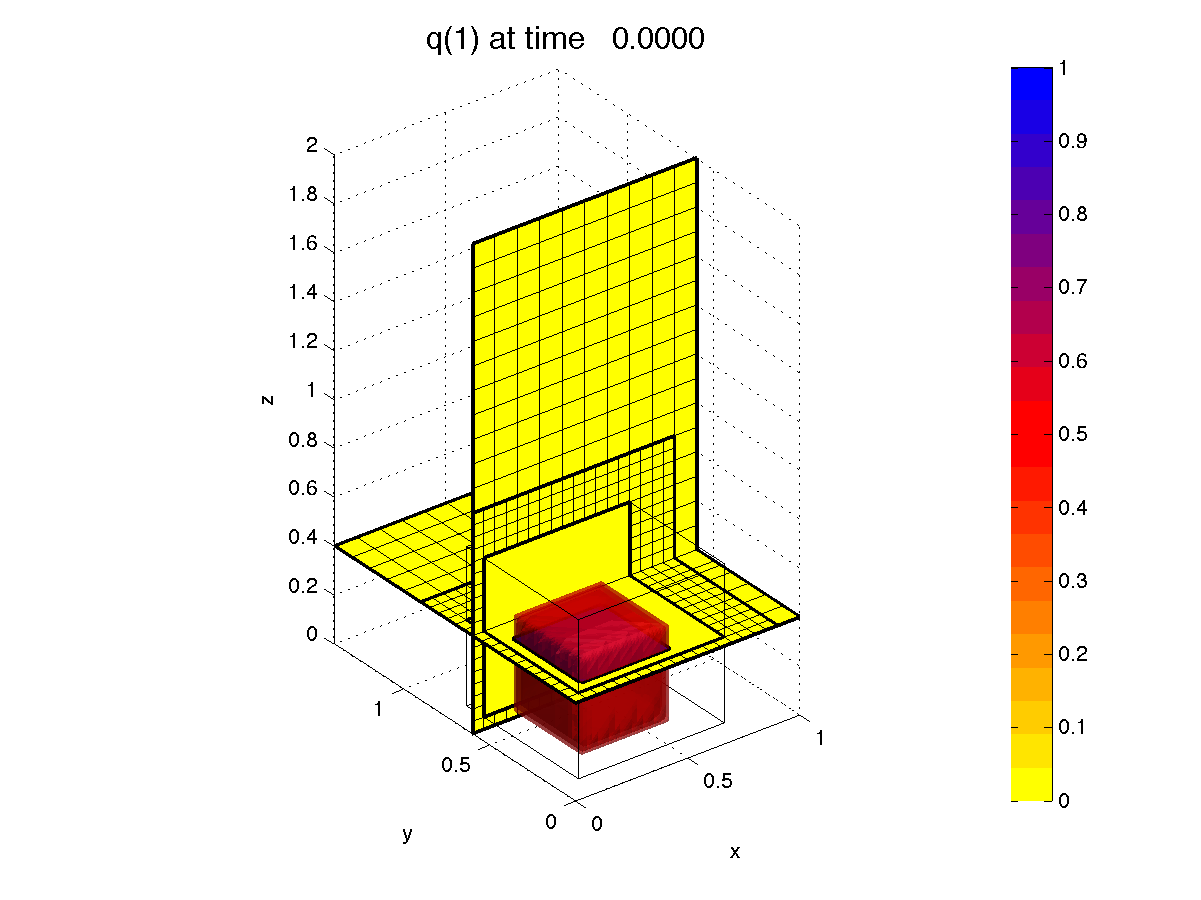

In [33]:
Image('frame0.png', width=400)

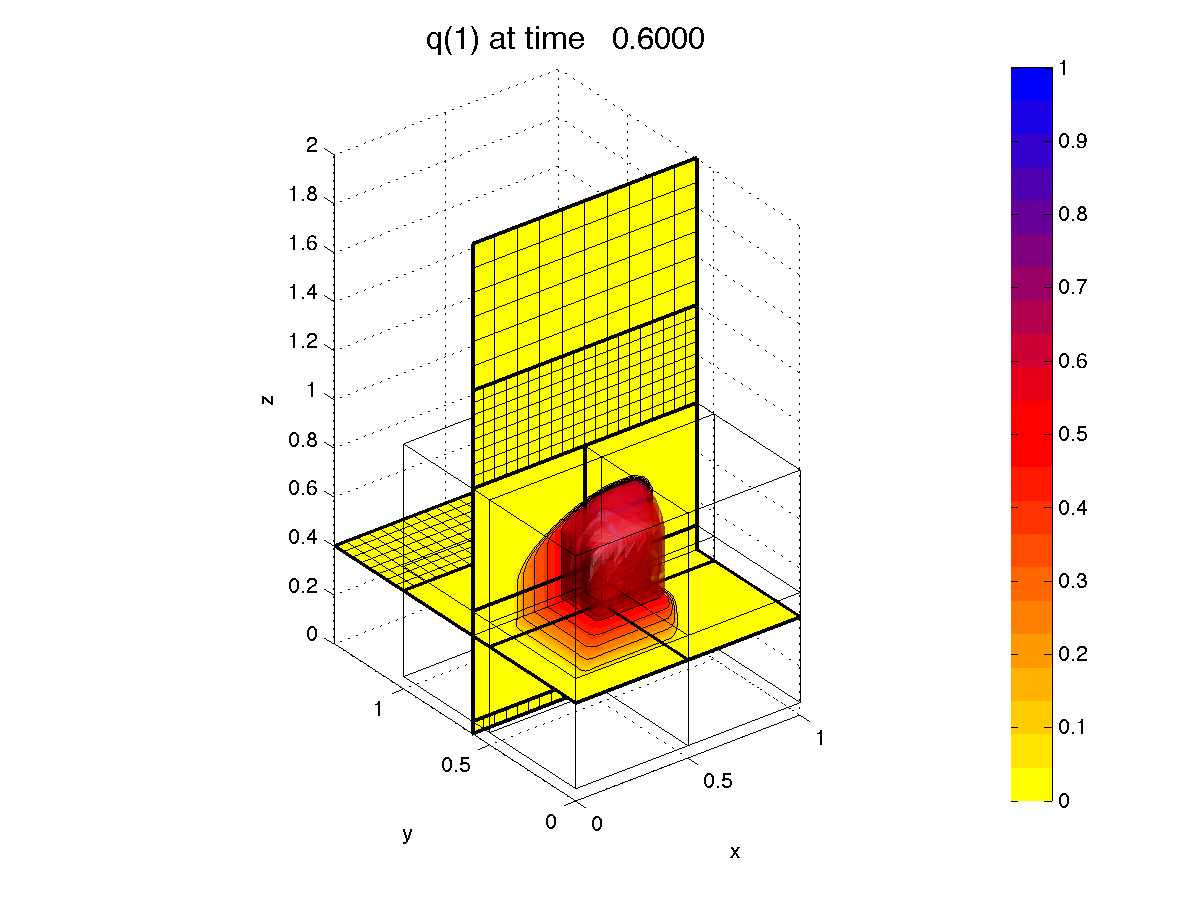

In [34]:
Image('frame3.png', width=400)

## Function to read in a frame of Clawpack data:

**Notes:**

- Requires equal refinement ratios at all levels, e.g. 

    `amrdata.refinement_ratios_x = [2, 2]`

  in `setrun.py` and not `[2,4]`.
  
- Levels start at 1 in AMRClaw but at 0 in yt, so shift `level` to `patch.level - 1`.

In [56]:
refine_by = 3  # refinement factor between levels, as in setrun.py

def load_ds(frame, path='./_output'):
    """
    Load a frame of amrclaw data and reformat for yt.
    Specify refinement factor `refine_by` if not 2.
    """
    sol = Solution(frame,path=path,file_format='ascii',file_prefix='fort')

    grid_data = []

    for state in sorted(sol.states, key = lambda a: a.patch.level):
        patch = state.patch

        d = {
            'left_edge': patch.lower_global,
            'right_edge': patch.upper_global,
            'level': patch.level-1,
            'dimensions': patch.num_cells_global,
            'q': state.q[0,...],
            'number_of_particles': 0
            }
        grid_data.append(d)
        bbox = np.vstack((sol.patch.lower_global,sol.patch.upper_global)).T;
    return yt.load_amr_grids(grid_data, sol.patch.num_cells_global, \
                             bbox = bbox, refine_by=refine_by)

In [57]:
ds = load_ds(0)

In [58]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	          2800	            15
  1	     1	         19683	            27
  2	     1	        157464	            54
----------------------------------------------
   	     3	        179947


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 3.601e-27 Mpc
	Width: 3.601e-21 pc
	Width: 7.427e-16 AU
	Width: 1.111e-02 cm


In [59]:
print "Lower corner: ",ds.domain_left_edge
print "Upper corner: ",ds.domain_right_edge
print "cells: ", ds.domain_dimensions

Lower corner:  [ 0.  0.  0.] code_length
Upper corner:  [ 1.   1.4  2. ] code_length
cells:  [10 14 20]



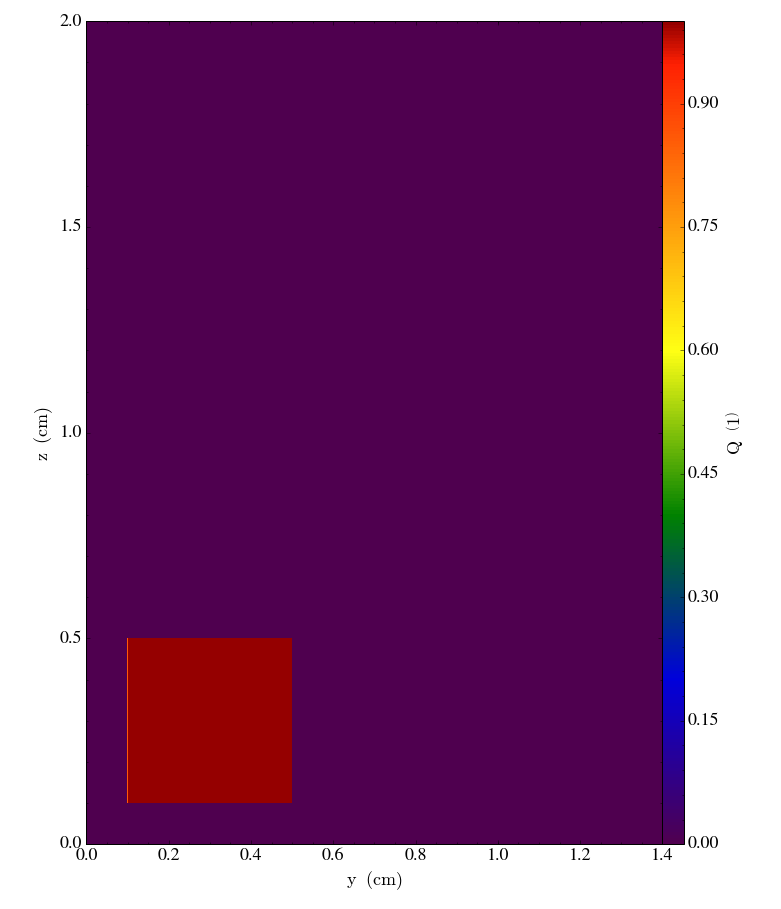

In [60]:
slc = yt.SlicePlot(ds, 'x', 'q', origin='native', center=[0.4,0.7,1.])
slc.set_log('q',False)

*How to make this figure smaller?*


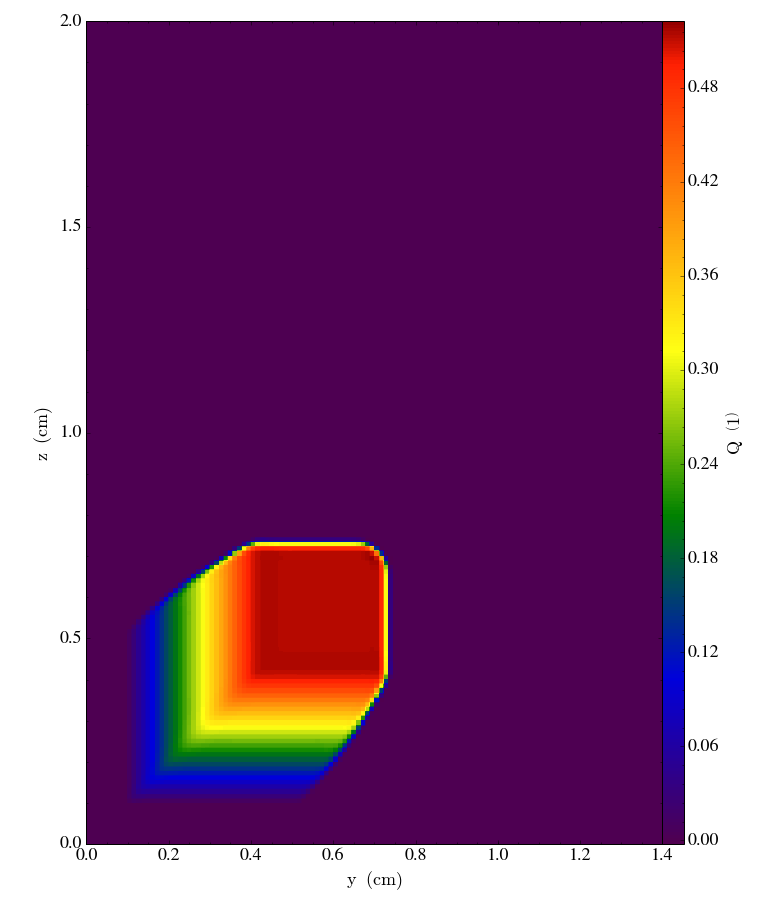

In [61]:
ds = load_ds(3)
slc = yt.SlicePlot(ds, 'x', 'q', origin='native', center=[0.4,0.7,1.])
slc.set_log('q',False)

### 3D plots

In [62]:
tf = yt.ColorTransferFunction((0,1))
tf.add_layers(10, colormap = 'RdBu_r')
N = 256

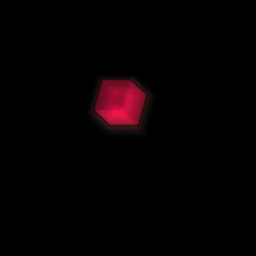

In [63]:
ds = load_ds(1)
c = (0,0,0)
L = (-1,-1.4,-2)
W = 2
cam = ds.camera(c, L, W, N, tf, fields = ['q'], log_fields = [False])
cam.show()
#im = cam.snapshot('test_rendering.png')
#Image('test_rendering.png')

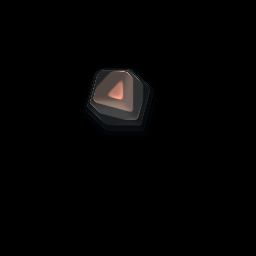

In [65]:
ds = load_ds(3)
cam = ds.camera(c, L, W, N, tf, fields = ['q'], log_fields = [False])
cam.show()